<div style="display: flex; align-items: center; justify-content: space-between; border-bottom: 3px solid #D0D0D0; padding: 10px; font-family: Arial, sans-serif;">
  <!-- Logo -->
  <img src="https://upload.wikimedia.org/wikipedia/commons/1/1c/Uoc_masterbrand_vertical.png" alt="Logo" style="width: 150px; height: auto;">

  <!-- Detalles -->
  <div style="text-align: right; line-height: 1.6; margin-left: 20px; margin-right: 80px">
    <p style="margin: 0; font-size: 1.2em; font-weight: bold; color: #333;">Proyecto: <span style="color: #878787;">Práctica - Parte 2</span></p>
    <p style="margin: 0; font-size: 1em; font-weight: bold; color: #333;">Notebook: <span style="color: #878787;">Exploración inicial de datos demográficos</span></p>
    <p style="color: #878787;">Juan Luis González Rodríguez - Visualización de datos</span></p>
  </div>
</div>


# 0. Librerías

In [201]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from pickle import dump

# 1.Exploración y limpieza de datos

Cada usuario tiene una carpeta llamada user_1, user_2, user_3, etc. De manera que d entro de cada carpeta hay un archivo CSV llamado user_info.csv. Se carga toda la información de los archivos CSV en un solo DataFrame.

In [202]:
# Creamos un df vacio
df_user_info = pd.DataFrame()

# Obtenemos la lista con los paths de los archivos
data_path = os.path.join('..', '0_data', 'MMASH')
csv_files = [os.path.join(root, file) for root, _, files in os.walk(data_path) for file in files if file.endswith('user_info.csv')]

# Iteramos sobre los archivos
for file in csv_files:
    # Leemos el archivo
    df = pd.read_csv(file, usecols=lambda column: column != 'Unnamed: 0')
    # Extraemos el identificador del usuario del nombre del fichero
    user_id = os.path.basename(os.path.dirname(file))
    # Añadimos la columna 'User' al dataframe
    df['User'] = user_id
    # Concatenamos el df al df principal
    df_user_info = pd.concat([df_user_info, df])

# Visualizamos el df
df_user_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 0 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  22 non-null     object
 1   Weight  22 non-null     int64 
 2   Height  22 non-null     int64 
 3   Age     22 non-null     int64 
 4   User    22 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.0+ KB


Seguidamente se comprueba que no hayan duplicados en el df.

In [203]:
print(df_user_info.duplicated().sum())

0


Se explorará la distribución del género, el peso la altura y la edad. Y se realizará una comprovación bivariante entre estas.

Comenzaremos revisando los estadísticos descriptivos de las variables.

In [204]:
# Variables numericas
print("Columnas numericas")
display(df_user_info.describe())

# Variables categoricas
print("Columnas categoricas")
display(df_user_info.drop(columns='User').describe(include='object'))


Columnas numericas


,Weight,Height,Age
count,22.000000,22.000000,22.000000
mean,75.045455,179.909091,26.045455
std,12.789420,8.216760,7.121244
min,60.000000,169.000000,0.000000
25%,67.000000,175.000000,25.000000
50%,70.000000,180.000000,27.000000
75%,80.000000,183.000000,27.750000
max,115.000000,205.000000,40.000000


Columnas categoricas


,Gender
count,22
unique,1
top,M
freq,22


**Género**

In [205]:
# Comprobamos los valores únicos de la columna 'Gender'
df_user_info['Gender'].value_counts()

Gender
M    22
Name: count, dtype: int64

Los 22 individuos que conforman la cohorte del estudio son varones. Es decir, que las conclusiones que saquemos de este proyecto no han de ser directamente aplicables sobre sujetos que se alejen del perfil que compone la cohorte.

**Peso**

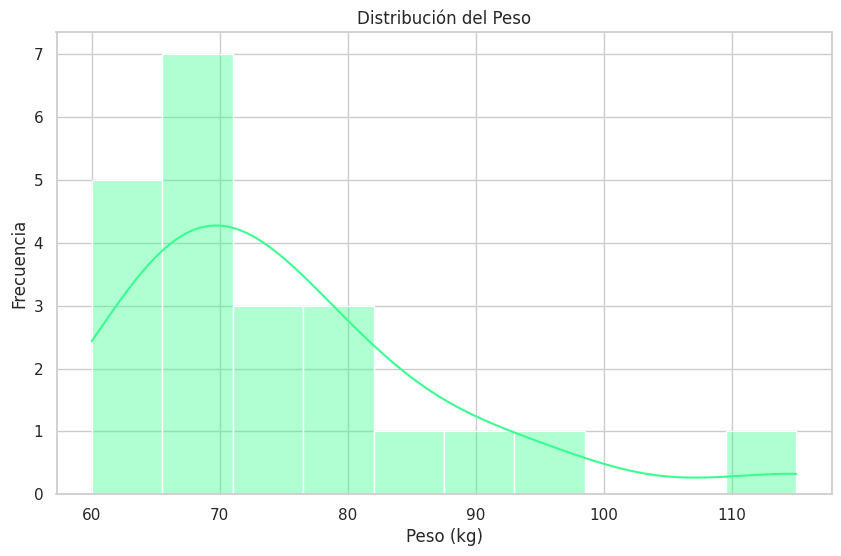

In [206]:
# Configuramos el estilo de los gráficos
sns.set_theme(style="whitegrid")

# Creamos el histograma con color personalizado
plt.figure(figsize=(10, 6))
sns.histplot(df_user_info['Weight'], bins=10, kde=True, color='#38FF90', alpha=0.4)
plt.title('Distribución del Peso')
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.show()

Se observa que la gran mayoría de las personas tiene un peso entre 60 y 80 kg. Sin embargo, algunos individuos tienen un peso ligeramente mayor. Todos los valores son válidos y no se detecta ningún valor atípico, por lo que nos encontramos ante una distribución asimétrica hacia la derecha.

**Altura**

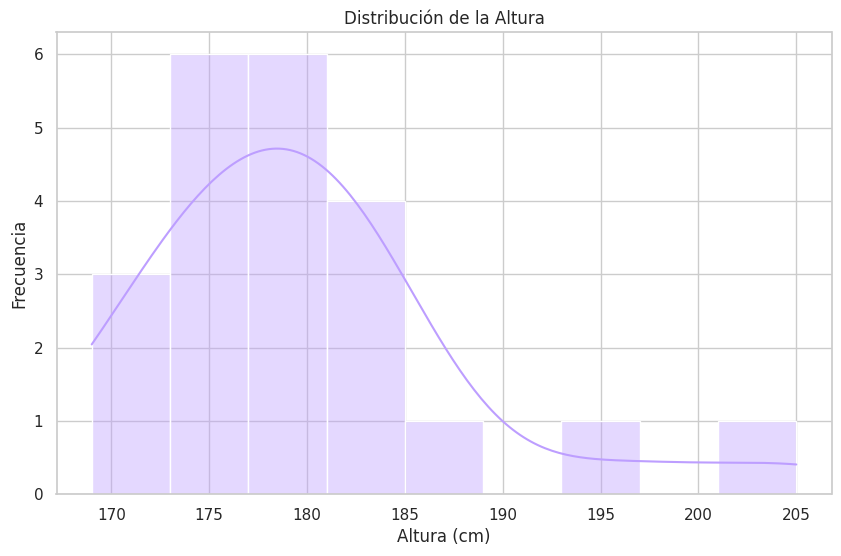

In [207]:
# Configuramos el estilo de los gráficos
sns.set_theme(style="whitegrid")

# Creamos el histograma con color personalizado
plt.figure(figsize=(10, 6))
sns.histplot(df_user_info['Height'], bins=9, kde=True, color='#BD9EFF', alpha=0.4)
plt.title('Distribución de la Altura')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.show()

Al igual que en el caso anterior, se presenta una distribución sesgada a la derecha. La mayoría de las alturas se encuentran entre los 170 y los 185 cm. Sin embargo, algunos individuos presentan alturas superiores a los 190 cm. Posteriormente estudiaremos la relación entre altura y peso, abordando si es mejor reportar ambas variables o si una derivada de estas, como podría ser el índice de masa corporal (IMC), es más informativa.


**Edad**

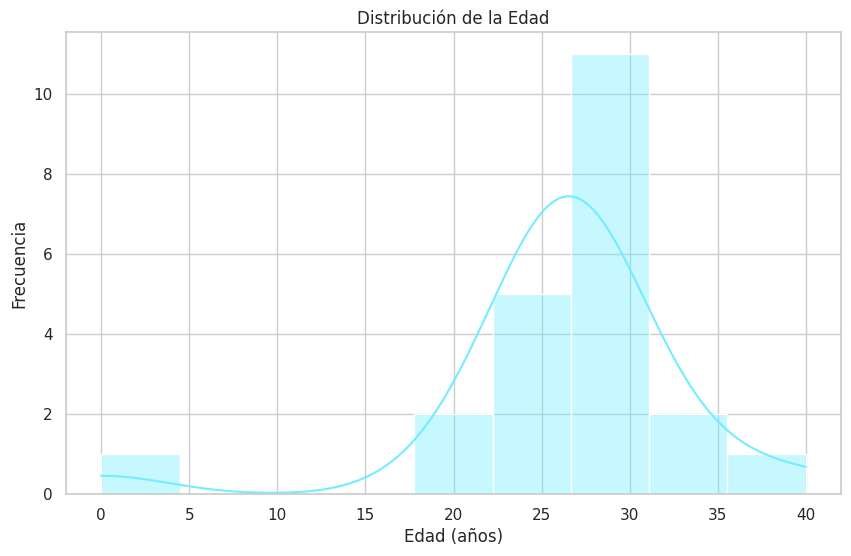

In [208]:
# Configuramos el estilo de los gráficos
sns.set_theme(style="whitegrid")

# Creamos el histograma con color personalizado
plt.figure(figsize=(10, 6))
sns.histplot(df_user_info['Age'], bins=9, kde=True, color='#73EDFF', alpha=0.4)
plt.title('Distribución de la Edad')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.show()

Se observa que hay un individuo con una edad de 0 años. Debido a la naturaleza del estudio, donde las cohortes suelen ser de personas adultas, se entiende que es un error. Al revisar la publicación del dataset, se observa que el individuo con edad 0 es un individuo del que no se recoge información sobre esa variable. Tal y como lo reflejan los autores "𝑈𝑠𝑒𝑟_18 did not provide his age data." [1] Lo ideal sería no usar información de la edad en el estudio o eliminar este individuo del dataset. No obstante, debido a que el resto de valores no presentan una desviación muy alta en términos de edad, se opta por imputar la edad media a este individuo.


In [209]:
# Comprobamos que usuario tiene la edad 0
df_user_info[df_user_info['Age'] == 0]

,Gender,Weight,Height,Age,User
0,M,80,180,0,user_18


In [210]:
# Calculamos la edad media de los usuarios y nos quedamos con el valor entero
mean_age = df_user_info['Age'].mean()
mean_age = int(mean_age)
print(f"El entero más cercano a la media de las edades es: {mean_age}")

# Sustituimos la edad 0 por la media
df_user_info['Age'] = df_user_info['Age'].replace(0, mean_age)

# Mostramos el usuario 18 para comprobar que se ha sustituido correctamente
df_user_info[df_user_info['User'] == 'user_18']

El entero más cercano a la media de las edades es: 26


,Gender,Weight,Height,Age,User
0,M,80,180,26,user_18


Se vuelve a visualizar la distribución de la edad.

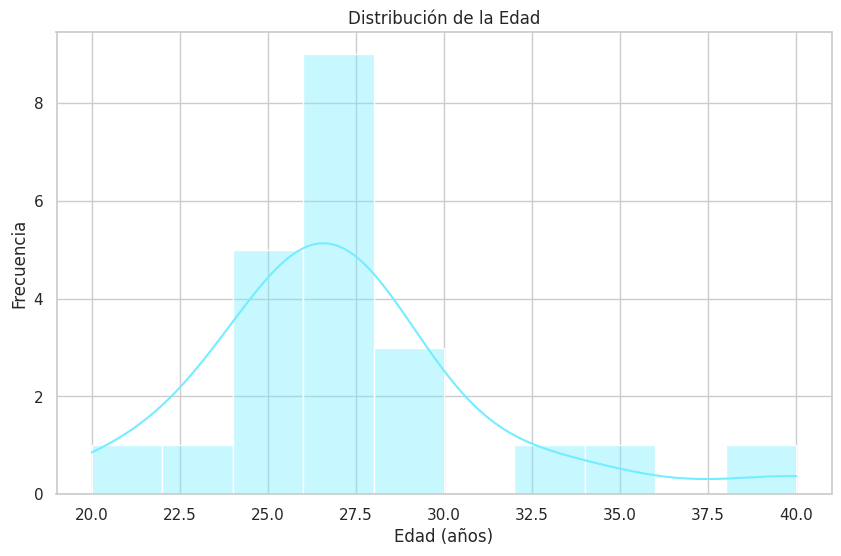

In [211]:
# Configuramos el estilo de los gráficos
sns.set_theme(style="whitegrid")

# Creamos el histograma con color personalizado
plt.figure(figsize=(10, 6))
sns.histplot(df_user_info['Age'], bins=10, kde=True, color='#73EDFF', alpha=0.4)
plt.title('Distribución de la Edad')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.show()

Tras realizar la imputación de la edad del *usuario 18*, del que no se tenía información, se observa nuevamente una distribución asimétrica a la derecha. Los valores de edad más frecuentes se encuentran entre los 23 y 30 años. Aunque estos valores son bastante acotados, responden a la razón de selección de la cohorte del estudio, que buscaba individuos jóvenes para reducir las variables no controladas del estudio.

**Análisis Bivariable**

A continuación, vamos a realizar un análisis bivariable para explorar las relaciones entre las diferentes variables del conjunto de datos. Lo realizaremos solo de la variable numérica, ya que la única categórica (Gender) siempre tiene el mismo valor.

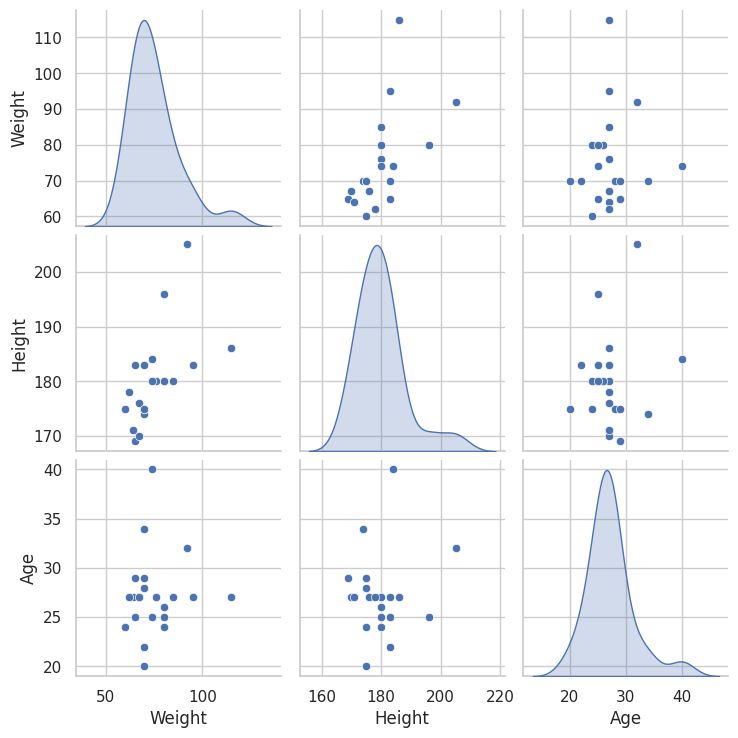

In [212]:
# Realiza un analisis bivariable de las variables numericas
sns.pairplot(df_user_info.drop(columns='User'), diag_kind='kde')

No se observan patrones claros en las relaciones entre las variables numéricas. Por lo que de manera visual no se encuentra ninguna relación clara entre las variables.

In [213]:
# Realizamos la prueba de Shapiro-Wilk para cada variable numérica
for column in ['Weight', 'Height', 'Age']:
    stat, p_value = shapiro(df_user_info[column])
    print(f'Variable: {column}, Estadístico: {stat}, p-valor: {p_value}')
    if p_value > 0.05:
        print(f'La variable {column} sigue una distribución normal (no se rechaza H0)')
    else:
        print(f'La variable {column} no sigue una distribución normal (se rechaza H0)')
    print()

Variable: Weight, Estadístico: 0.8511422203515929, p-valor: 0.0035565361254581503
La variable Weight no sigue una distribución normal (se rechaza H0)

Variable: Height, Estadístico: 0.8633974839532434, p-valor: 0.00591304416633525
La variable Height no sigue una distribución normal (se rechaza H0)

Variable: Age, Estadístico: 0.8665156273866936, p-valor: 0.0067467797022215245
La variable Age no sigue una distribución normal (se rechaza H0)



Como ninguna de las 3 variables sigue una distribución normal, vamos a realizar un análisis de correlación no paramétrico con el coeficiente de correlación de Spearman.

In [214]:
# Coeficiente de correlación de Spearman
correlation = df_user_info[['Weight', 'Height', 'Age']].corr(method='spearman')
print(correlation)

          Weight    Height       Age
Weight  1.000000  0.681989  0.072713
Height  0.681989  1.000000 -0.131088
Age     0.072713 -0.131088  1.000000


Solo hay una relación relativamente significante entre peso y altura. No obstante debido a los últimos indicios en investigaiones como "*Exploration of an alternative to body mass index to characterize the relationship between height and weight for prediction of metabolic phenotypes and cardiovascular outcomes*" [2] se decicde por mantener las 2 variables como independientes en lugar de calcular el IMC.

# 2. Guardamos el dataframe como un fichero pickle

In [215]:
out_folder = os.path.join('..', '0_data', "clean_MMASH")
filename = 'user_info_clean.pkl'

# Comprobamos si la carpeta existe, si no la creamos
if not os.path.exists(out_folder):
    os.makedirs(out_folder)

# Comprobamos si el archivo existe, de ser así lo eliminamos
if os.path.exists(os.path.join(out_folder, filename)):
    os.remove(os.path.join(out_folder, filename))

# Guardamos el df en un archivo pickle
df_user_info["User_order"] = df_user_info["User"].str.extract(r'(\d+)').astype(int)
df_user_info = df_user_info.sort_values("User_order").drop(columns="User_order")
df_user_info.reset_index(drop=True, inplace=True)
df_user_info.to_pickle(os.path.join(out_folder, filename))

# Bibliografía

[1]: Rossi, A., Da Pozzo, E., Menicagli, D., Tremolanti, C., Priami, C., Sîrbu, A., Clifton, D. A., Martini, C., & Morelli, D. (2020). A Public Dataset of 24-h Multi-Levels Psycho-Physiological Responses in Young Healthy Adults. Data, 5(4), 91. https://doi.org/10.3390/data5040091

[2] Shuey MM, Huang S, Levinson RT, et al. Exploration of an alternative to body mass index to characterize the relationship between height and weight for prediction of metabolic phenotypes and cardiovascular outcomes. Obes Sci Pract. 2022; 8(1): 124-130. https://doi.org/10.1002/osp4.543